# PyMADREQ development story and ideas
Here, I do things as I progress in the development of PyMADREQ. The current goal is to have a package that solves multicomponent single and two phase flow (advection-diffusion) with a sequential reactive solver. I will implement some of my old ideas for creating robust solvers for two phase flow data analysis (viz. core flooding tests).

In [38]:
from importlib import reload
from pymadreq import *
import pymadreq.coreflood as coreflood
import matplotlib.pyplot as plt
import numpy as np
reload(coreflood)
from scipy.sparse import vstack, hstack

In [39]:
pc_wet = coreflood.CapillaryPressurePiecewise(sw_pc0=0.6, 
                                              pc_min=-1e6, pc_max=5e6, 
                                              pc_lm=-5e4, pc_hm=7e4, 
                                              swc=0.15, sor=0.2,
                                              extrap_factor=200.0, 
                                              curve_factor_l=5.0, curve_factor_h=10.0)

2.0
[[0.00000000e+00 1.00000000e+09]
 [1.50000000e-01 5.00000000e+06]
 [2.73449211e-01 2.62400890e+05]
 [3.75000000e-01 1.94365063e+05]
 [6.00000000e-01 1.37436854e+05]
 [8.00000000e-01 1.14354375e+05]
 [1.00000000e+00 1.00000000e+05]]


(0.15, 0.8, -1000000.0, 5000000.0)

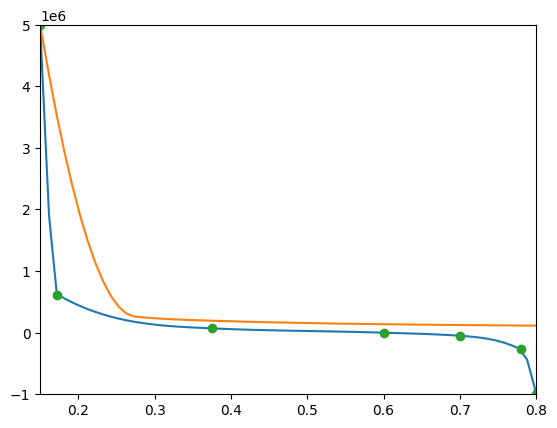

In [40]:
pc_wet.visualize()
plt.axis([pc_wet.swc, 1-pc_wet.sor, pc_wet.pc_imb(1-pc_wet.sor), pc_wet.pc_imb(pc_wet.swc)])

C:\Users\aliak\AppData\Local\Temp\ipykernel_10956\1884968533.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(sw_t), np.log(pc_wet.pc_imb(sw_t)), label='wet')


0.2712999818340087

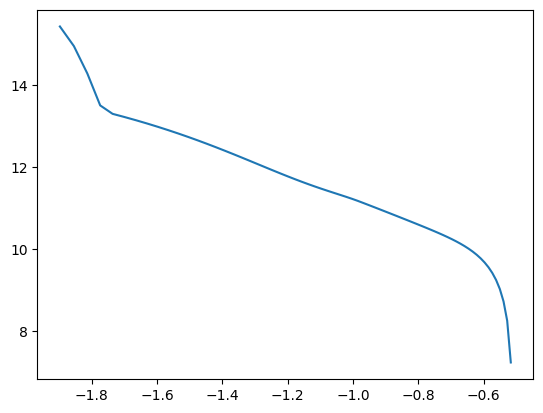

In [41]:
sw_t = np.linspace(pc_wet.swc, 1-pc_wet.sor, 100)
# sw_t = np.linspace(0, 1, 100)
# plt.plot(np.log((2*sw_t-1)/(1-pc_wet.swc)), np.log(pc_wet.pc_imb(sw_t)), label='wet')
plt.plot(np.log(sw_t), np.log(pc_wet.pc_imb(sw_t)), label='wet')
# fit a line to data in numpy
pc_val = pc_wet.pc_imb(sw_t)
slope, intercept = np.polyfit(np.log(sw_t)[pc_val>0], np.log(pc_val[pc_val>0]), 1)
-1/slope


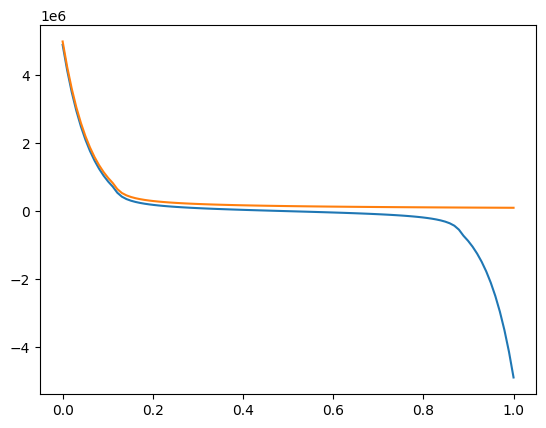

In [42]:
pc_brooks = coreflood.CapillaryPressureBrooksCorey()
pc_brooks.visualize()

In [49]:
fluid1 = coreflood.Fluids()
rel_perm1 = coreflood.RelativePermeability()
res1 = coreflood.Reservoir(rel_perm=rel_perm1, fluids=fluid1)
op_cond = coreflood.OperationalConditions()
core1 = coreflood.CoreModel1D(res1, op_cond)

In [50]:
core1.simulate(final_time=5000.)

c:\Users\aliak\venvs\myfvm\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
d:\projects\github\PyMADREQ\pymadreq\coreflood.py:470: RuntimeWarning: divide by zero encountered in scalar divide
  dt = np.min([dt*(self.dsw_allowed/dsw), 2*dt, final_time-t])


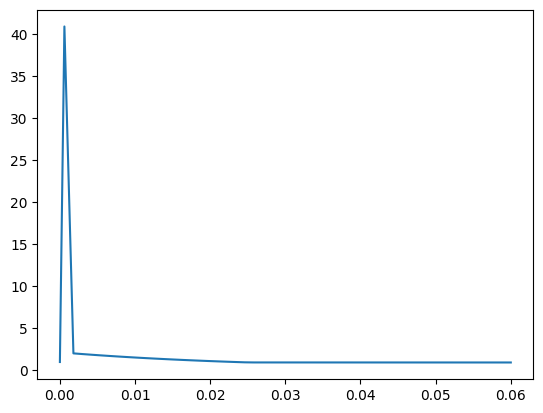

In [52]:
fv.visualizeCells(core1.saturation)

In [45]:
import pyfvtool as fv
m = fv.createMesh1D(10, 1.0)
c = fv.createCellVariable(m, 1.0)
bc = fv.createBC(m)
M, RHS = fv.boundaryConditionTerm(bc)

In [46]:
np.hstack([RHS, RHS])

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])